# INTRODUCTION 

Much of the introduction was taken directly or adapted from the World Bank's [Open Nighttime Lights Tutorial](https://worldbank.github.io/OpenNightLights/welcome.html), which also provides guidance on using nighttime light data from satellites. The following Radiance Calibrated Nighttime Lights Tutorial differs from the Open Nighttime Lights Tutorial in focusing on data from sensors which were calibrated to avoid saturation of urban centers. For more details on Remote Sensing and the Nighttime Lights data, including videos, see the Open Nighttime Lights Tutorial.   
  
This tutorial draws inspiration for the analyses of Radiance Calibrated Nighttime Lights from "Subways and Urban Growth: Evidence from Earth" (2018), by Marco Gonzalez-Navarro and Matthew Turner. However, it does not directly follow the methodology used in this paper for all calculations. As such, certain values may differ from those obtained by Gonzalez-Navarro and Turner when compared at a granular level.

## Introduction to Remote Sensing

This section is adopted from module 1, section 1 of [Open Nighttime Lights](https://worldbank.github.io/OpenNightLights/tutorials/mod1_1_introduction_to_remote_sensing.html).

**Remote sensing** is the science of identifying, observing, collecting, and measuring objects without coming into direct contact with them. This can be accomplished through many devices that carry sensors and capture the characteristics of Earth remotely. Sensors on board satellites also record the electromagnetic energy that is reflected or emitted from objects on Earth. There are two types of sensors:

* **Passive sensors** record the natural energy that is (naturally) reflected or emitted from the Earth's surface (e.g. sunlight, moonlight, city lights).
* **Active sensors** provide their own energy source for illumination (e.g. RADAR, LIDAR).

## Introduction to Radiance Calibrated Nighttime Light Data

This section is adapted from module 1, section 2 of [Open Nighttime Lights](https://worldbank.github.io/OpenNightLights/tutorials/mod1_2_introduction_to_nighttime_light_data.html).

### DMSP-OLS Overview

Sensors aboard Defense Meteorological Satellite Program (DMSP) satellites have been providing low-light imaging of the Earth's surface since the 1960s, with a digital archive established in 1992 at NOAA's National Centers for Environmental Information ([NCEI](https://www.ngdc.noaa.gov/)), formerly the National Geophysical Data Center (NGDC). The Operational Linescan System (OLS) onboard the DMSP satellites (DMSP-OLS) provided the primary data on nighttime lights until the introduction of the Joint Polar Satellite System (JPSS) program, which officially launched its first satellite in 2017. This JPSS program uses the Visible Infrared Imaging Radiometer Suite Day/Night Band (VIIRS-DNB) sensor, the first of which was launched aboard the S-NPP satellite in 2011 to serve as a transition between DMSP and JPSS. While the DMSP-OLS product was discontinued in 2014, the data stored in NOAA's archive still serves as the primary source of nighttime light data from 1992-2014, and as such is a valuable tool for academics and policy makers. 

### DMSP-OLS Usage and Limitations

While advanced for its time, the OLS is now old technology and was essentially unchanged since 1976 with the start of the Block 5D series of DMSP satellites. The OLS VIS, the low-light imaging band, has only **6-bit quantization** (its digital values range from 0-63). The **gain** of the instrument, which is a multiplier on the signal (analogous to a volume setting), is adjusted on-the-fly onboard the satellite via an algorithm that takes into account the amount of expected moonlight and sunlight for the time and location. The dynamic gain adjustment of the OLS allows the VIS sensor to produce meaningful imagery under a wide range of conditions, from full sunlight during the day to a dark night with the moon below the horizon. The OLS gain states are not recorded in the global OLS data that is relayed back to the ground stations, **making any downstream calibration difficult to achieve.** The OLS VIS band has no **on-board calibration**, so the 64 (0-63) values are only relative values based on the gain in which the data were recorded. The lack of on-board calibration also means the the DMSP-OLS annual stable lights series derived from multiple OLS sensors and different years (1992–2013) are not comparable directly without inter-calibration.

For nighttime data, only imagery from nights with no moonlight present was included. Under no moonlight conditions, the dynamic gain algorithm sets the VIS gain to its maximum value. Using only these data gave some assurance that the gain was constant (albeit unknown) and that it was reasonable to temporally average these VIS band values. The high gain setting also meant that dimmer lights could be detected in the composites. The downside is that when the gain is set to its maximum value, the VIS band, with its 6-bit radiometric resolution, **saturates over bright urban centers.** This means all values have the maximum value of 63 leaving the variability within urban cores unresolvable (Figure 1.1).

<img src="img/mod1-2-dmsp-saturation.png" width="700" align="center"/>  
**Figure 1.1** A subset of the F18 2013 stable lights composite over Chicago and surrounding communities illustrates the effect that saturation in the DMSP-OLS VIS band has on the information content in urban centers. The upper left image is a grayscale image where the horizontal and vertical red lines are the locations for the profile data plotted in the two charts. The upper right image is the same subset, but with saturated values colored red. Notice that most of the Chicago metropolitan area is saturated so no further detail is available using these data. The two charts are plots of transects through the image, showing the average DN value in the composite along horizontal and vertical tracks through Chicago. While there is variation in average DN values across the smaller towns, the larger urban cores are saturated.


**Saturation** occurs when pixels in bright areas, such as in city centers, reach the highest possible digital number (DN) value (i.e., 63) and no further details can be recognized.

### Radiance Calibrated Nighttime Light Data

To account for the saturation of city centers in the DMSP-OLS nighttime light data, a limited set of observations were also collected with lower gain settings, making the sensor less sensitive to light. While this makes the sensor less able to identify dim lights, for the purposes of studying lighting within city boundaries it is a more useful source than the standard DMSP-OLS data. To provide this additional detail, the data collected from the sensors at lower gain levels were merged with the primary nighttime light product to recover the variation within bright areas. Radiance calibrated data are available from 1996 to 2010 at intervals of 1 to 4 years. 

Given that the DMSP-OLS sensors had differing levels of sensitivity, the gain levels at which the sensors were set are not consistent across different satellites. When merging the radiance calibrated data, this is addressed by using the highest level of gain as a reference and weighting the lower-level gain data accordingly. This product is unitless due to the variable gain settings and a degredation in the sensors over time, and thus is recommended only for use which doesn't require numeric radiance values. Due to the differences in sensors and gain levels over time, it is necessary to perform inter-annual calibration to compare the radiance calibrated data from different years. 

# INTRODUCTION TO GEOSPATIAL DATA AND TOOLS

## Data Structure
In geospatial data analysis, data can be classified into two categories: raster and vector data. A graphic comparison between raster and vector data can be found in the World Bank [Nighttime Lights Tutorial module 2, section 1](https://worldbank.github.io/OpenNightLights/tutorials/mod2_1_data_overview.html).

* **Raster data**: Data stored in a raster format is arranged in a regular grid of cells, without storing the coordinates of each point (namely, a cell, or a pixel). The coordinates of the corner points and the spacing of the grid can be used to calculate (rather than to store) the coordinates of each location in the grid. Any given pixel in the grid stores one or more values (in one or more bands).
* **Vector data**: Data in a vector format is stored such that the X and Y coordinates are stored for each point. Data can be represented, for example, as points, lines and polygons. A point has only one coordinate (X and Y), a line has two or more coordinates, and a polygon is essentially a line that closes on itself to enclose a region. Polygons are usually used to represent the area and perimeter of continuous geographic features. Vector data stores features in their original resolution, without aggregation.  
    
In this tutorial, we will use vector and raster data. Geospatial data in vector format are often stored in a **shapefile**, a popular format for storing vector data developed by ESRI. The **shapefile** format is actually composed of multiple individual files which make up the entire data. At a minimum, there will be 3 file types included with this geographic data (.shp, .shx, .dbf), but there are often other files included which store additional information. In order to be read and used as a whole, all file types must have the same name and be in the same folder. Because the structure of points, lines, and polygons are different, each shapefile can only contain one vector type (all points, all lines, or all polygons). You will not find a mixture of point, line, and polygon objects in a single shapefile, so in order to work with these different types in the same analysis, multiple shapefiles will need to be used and layered. For more details on shapefiles and file types, see [this documentation](https://desktop.arcgis.com/en/arcmap/latest/manage-data/shapefiles/shapefile-file-extensions.htm).  
    
Raster data, on the other hand, is stored in Tagged Image File Format (TIFF or TIF). A GeoTIFF is a TIFF file that follows a specific standard for structuring meta-data. The meta-data stored in a TIFF is called a tif tag and GeoTIFFs often contain tags including spatial extent, coordinate reference system, resolution, and number of layers.   
  
More information and examples can be found in sections 3 & 4 of the [Earth Analytics Course](https://www.earthdatascience.org/courses/earth-analytics/).  


## Python and Google Earth Engine API

To perform our analysis, we'll obtain the Radiance Calibrated Nighttime Light data from [Google Earth Engine](https://earthengine.google.com/). For necessary Python setup and an introduction to our use of the GEE Python API, see the [World Bank Nighttime Light Tutorial](https://worldbank.github.io/OpenNightLights/tutorials/mod2_2_getting_started_with_Python.html), module 2 sections 2-5. In particular, before proceeding you will need to have `jupyter` and `geemap` installed on your machine, and you will need to apply for a Google Earth Engine account [here](https://signup.earthengine.google.com/). **It may take a day or longer** for your Google Earth Engine account to be granted access.  
  
Two of the primary packages we'll be using, Pandas and GeoPandas, must be installed according to their installation instructions: [Pandas Installation](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html) and [GeoPandas Installation](https://geopandas.org/getting_started/install.html). If you're on Windows, GeoPandas installation can occasionally be temperamental - using an environment, as described in the World Bank Nighttime Lights Tutorial, can often circumvent any issues, but if you're still having problems, there are a number of guides online, such as this [Practial Data Science guide](https://www.practicaldatascience.org/html/gis_setup_geopandas.html) or this [Medium post](https://nayanemaia.medium.com/installing-geopandas-on-windows-aadd762c557c) by Nayane Maia, which provide installation help. Using [Windows Subsystem for Linux (WSL)](https://docs.microsoft.com/en-us/windows/python/web-frameworks) can also make use of tricky packages like GeoPandas easier.  

## Accessing the Radiance Calibrated Nighttime Lights Data

While the Radiance Calibrated Nighttime Lights data can be downloaded directly as GeoTIFFs from the [NOAA/NCEI Earth Observation Group site](https://ngdc.noaa.gov/eog/dmsp/download_radcal.html), it can be more convienent and efficient to use Google Earth Engine's API to create a standardized process to ingest these data, particularly if more than one file is desired for analysis. We'll follow the [World Bank Nighttime Light Tutorial, module 2, section 6](https://worldbank.github.io/OpenNightLights/tutorials/mod2_6_practical_exercise-image_visualization.html), though with the Radiance Calibrated data rather than the standard DMSP-OLS data. First, we'll initialize (or authenticate, for the first use) our connection to Google Earth Engine. Next, we can view a map of the area we'll be working with for our examples today: Istanbul, Turkey.

In [17]:
import geemap.eefolium, ee
import pandas as pd
try:
        ee.Initialize()
except Exception as e:
        ee.Authenticate()
        ee.Initialize()

In [2]:
# set our initial map parameters for Istanbul, Turkey
center_lon = 28.95
center_lat = 41.03 
zoomlevel=11

# initialize our map
IstMap = geemap.eefolium.Map(center=[center_lat,center_lon], zoom=zoomlevel)

IstMap

With our basemap centered over Istanbul, we can now collect the DMSP-OLS radiance calibrated nighttime light data through the Google Earth Engine API. We'll obtain this data as an [ImageCollection](https://developers.google.com/earth-engine/guides/ic_creating). Each [Image](https://developers.google.com/earth-engine/guides/image_overview) is a representation of raster data, with the values for one or many spectral bands provided for a particular time range over an area.
  
The Image Collection ID for this data is `NOAA/DMSP-OLS/CALIBRATED_LIGHTS_V4` (for details, see the [GEE Catalog Page](https://developers.google.com/earth-engine/datasets/catalog/NOAA_DMSP-OLS_CALIBRATED_LIGHTS_V4?hl=en#bands)), and we can filter for a specific year to limit the amount of data once we bring it in. See the [NOAA page](https://ngdc.noaa.gov/eog/dmsp/download_radcal.html) for these data to identify which satellites (F12, F12-F15, F14-F15, F15, F16) provided which years (1996, 1999, 2000, 2002, 2004, 2005, 2010) for more information. We can take the 2010 data as an example, which was collected with the F16 satellite.  

In [19]:
# define ImageCollection id
dmsp_rc_id = "NOAA/DMSP-OLS/CALIBRATED_LIGHTS_V4"

# create an ee object for our 2010 image
dmsp10 = ee.ImageCollection(dmsp_rc_id).filterDate('2010-01-01', '2010-12-31')
# view ImageCollection contents
dmsp10.getInfo()

{'type': 'ImageCollection',
 'bands': [],
 'id': 'NOAA/DMSP-OLS/CALIBRATED_LIGHTS_V4',
 'version': 1599658494915631,
 'properties': {'date_range': [826934400000, 1312070400000],
  'period': 0,
  'system:visualization_0_min': '3.0',
  'type_name': 'ImageCollection',
  'system:visualization_0_bands': 'avg_vis',
  'system:is_global': 1,
  'thumb': 'https://mw1.google.com/ges/dd/images/NIGHTTIME_thumb.png',
  'description': '<p>The Defense Meteorological Program (DMSP) Operational Line-Scan System\n(OLS) has a unique capability to detect visible and near-infrared (VNIR)\nemission sources at night.</p><p>This collection contains global nighttime lights images with no sensor\nsaturation. The sensor is typically operated at a high-gain setting to\nenable the detection of moonlit clouds. However, with six bit quantization\nand limited dynamic range, the recorded data are saturated in the bright\ncores of urban centers. A limited set of observations at low lunar\nillumination were obtained wher

Using `getInfo()`, we're able to see the contents of the ImageCollection, which can be helpful both in understanding what you're working with and in diagnosing any issues. The first chunk of information describes the ImageCollection as a whole, while further down under 'features', the individual Images and their respective bands are identified. For example, this range of data we selected contains two Images (IDs: NOAA/DMSP-OLS/CALIBRATED_LIGHTS_V4/F16_20100111-20101209_V4 and NOAA/DMSP-OLS/CALIBRATED_LIGHTS_V4/F16_20100111-20110731_V4), each with two bands: avg_vis and cf_cvg. This matches the 'Bands' listed in the [GEE Catalog listing](https://developers.google.com/earth-engine/datasets/catalog/NOAA_DMSP-OLS_CALIBRATED_LIGHTS_V4?hl=en#bands), so all indications are we are good to proceed.  
  
A next step can be to visualize these radiance-calibrated nighttime lights over our area of interest.  

**NOTE:** While this code will allow you to obtain the correct, calibrated nighttime lights data in the ImageCollection `dmsp10_vis`, depending on the platform you're using to run this Python notebook, the visualization **may appear saturated** over the city. This is a limitation when combining some of the visualization tools with some programs for running Python code. If this happens with your image, you can [run the same script on Google Earth Engine's code editor](https://code.earthengine.google.com/a98628b5265dae71c984b800386ada9c), which will allow you to view the correct gradient of light.

In [146]:
center_lon = 28.95
center_lat = 41.03 
zoomlevel = 10

# create an ee object for our 2010 image
dmsp10_vis = dmsp10.select('avg_vis')
visrange = {
  min: 0,
  max: 600,
  'palette': ['black','grey','white']
}

# initialize another map add this image as a layer to our map object
# and call the layer: "DMSP Radiance Calibrated 2010"
IstMap2 = geemap.eefolium.Map(center=[center_lat,center_lon], zoom=zoomlevel)
IstMap2.addLayer(dmsp10_vis, vis_params=visrange, name='DMSP Radiance Calibrated 2010')

IstMap2.addLayerControl()
IstMap2


We can also use a defined boundary map of Istanbul to build our map and apply the Radiance Calibrated Nighttime Light data, which will allow us to filter the light data for our area of interest rather than using the data for the entire world. This can improve performance by limiting the amount of data being processed. We'll use the [Global Administrative Unit Layers (GAUL)](https://data.apps.fao.org/map/catalog/srv/eng/catalog.search#/metadata/9c35ba10-5649-41c8-bdfc-eb78e9e65654) data, which provides geographic information on multiple levels of administrative areas for most countries worldwide. We can access this data through the Google Earth Engine as well (see GEE documentation [here](https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_2015_level1)). The feature collection identification we need is `FAO/GAUL/2015/level1`, and we'll filter for `ADM1_NAME` of Istanbul. (For more information on the countries and administrative levels provided by GAUL 2015, download the GAUL2015_Documentation.zip from the [GAUL Catalog Page](https://data.apps.fao.org/map/catalog/srv/eng/catalog.search#/metadata/9c35ba10-5649-41c8-bdfc-eb78e9e65654). _WhatsNewGAUL2015.pdf_ contains a table of all countries identifying which countries and administrative levels are available.)

In [148]:
# extract the Istanbul administrative area boundaries
ist_geom = ee.Feature(ee.FeatureCollection("FAO/GAUL/2015/level1").filter(ee.Filter.eq('ADM1_NAME', 'Istanbul')).first()).geometry()

zoomlevel = 9
# map the Istanbul administrative boundaries to confirm 
IstMap3 = geemap.eefolium.Map(center=[center_lat,center_lon], zoom=zoomlevel)
IstMap3.addLayer(ist_geom, {}, "Istanbul Administrative Area")
IstMap3

We now can use these boundaries to **clip** the Radiance Calibrated Nighttime Lights data to our area of interest.

In [25]:
# clip full radiance calibrated nighttime lights data to istanbul boundaries
# take the median value of both Images to use as our final value for each pixel
dmsp10_ist = dmsp10_vis.median().clip(ist_geom)

In [147]:
# map the clipped radiance calibrated nighttime lights
map1 = geemap.eefolium.Map()
map1.centerObject(ist_geom, zoom=9)
# use another basemap for additional options
map1.add_basemap('SATELLITE')
map1.addLayer(dmsp10_ist, {}, "Radiance Calibrated 2010")
map1.addLayerControl()
map1


# OPERATIONS AND ANALYSIS

## Create areas around city center

In order to perform analyses on a geographic area, it can often be helpful to define boundaries to create an area of interest. Using the example of Istanbul, we can create an area around the city center with a radius of 750 m to demonstrate.  
  
To create a circular buffer around our city center point, we can use [geopandas](https://geopandas.org/index.html). `Geopandas` is a popular Python package for working with geographic data, and it will easily allow us to create circular areas around a given point. To start, we will create our city center from the latitude and longitude values above using `geopandas.points_from_xy()`. Since we'll be wanting to calculate distance from points, we'll need to learn a bit about Coordinate Reference Systems (CRS). For more information on Coordinate Reference Systems in Python, see this [Towards Data Science](https://towardsdatascience.com/how-to-handle-map-projections-properly-in-python-bcbff78895c4) tutorial by Abdishakur.
  
One of the most common Coordinate Reference Systems is World Geodetic System 1984 (WGS84), which has the code EPSG:4326. This system defines locations on a three-dimensional surface using degrees (latitude and longitude) and is what is used by GPS systems. We can initially set our Coordinate Reference System (CRS) to 4326, since we will ultimately want to view and combine our data using this system, and we can easily view the details of this CRS using `geopandas.crs()`:

In [30]:
import geopandas as gpd 

# create basic geopandas dataframe to store the city center point
loc_df = pd.DataFrame({'city':'Istanbul', 'lon':center_lon, 'lat':center_lat}, index=['IST'])
loc_gdf = gpd.GeoDataFrame(loc_df, geometry=gpd.points_from_xy(loc_df.lon, loc_df.lat, crs=4326))
loc_gdf

,city,lon,lat,geometry
IST,Istanbul,28.95,41.03,POINT (28.95000 41.03000)


In [31]:
# examine the crs of the created city center point
loc_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We see that the name of the CRS is WGS 84 and that the axis use latitude and longitude in degrees. The Area of Use demonstrates that this is a global coordinate system and shows the degree bounds we're familiar with for lat/lon.  
  
However, if we want to calculate the distance from a given point in meters, we can't use this CRS, as it's measured in degrees. Instead, we need to choose a CRS which can correctly identify meters around our given area of interest, which is Istanbul. This will require using a *projected coordinate system*, which is defined on a two-dimensional surface and will allow us to use traditional distance measures. To search for the appropriate CRS for a location, you can use https://epsg.io/ - we find that [EPSG:5637](https://epsg.io/5637) will work for Turkey. We can project to this CRS easily with geopandas using `to_crs()`. For more information about projections, see this [ESRI](https://desktop.arcgis.com/en/arcmap/latest/map/projections/projection-basics-for-gis-professionals.htm) explainer.

In [32]:
loc_gdf = loc_gdf.to_crs(5637)
loc_gdf

,city,lon,lat,geometry
IST,Istanbul,28.95,41.03,POINT (5543159.083 1816518.609)


In [33]:
loc_gdf.crs

<Projected CRS: EPSG:5637>
Name: TUREF / LCC Europe
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Turkey - onshore and offshore.
- bounds: (25.62, 34.42, 44.83, 43.45)
Coordinate Operation:
- name: Europe Conformal 2001
- method: Lambert Conic Conformal (2SP)
Datum: Turkish National Reference Frame
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Now when we check for information on our Coordinate Reference System, we find we're using a Projected CRS which measures distance in metres and is used for Turkey. We are now all set to create a buffer area around our point of 750 meters as an example.

In [34]:
# Create area of radius 750 m around our original point
loc_gdf['geometry'] = loc_gdf.geometry.buffer(750)

To use this buffer area with our other geographic information when mapping, we'll finally convert it back to EPSG:4326 and confirm we see the expected CRS information.

In [35]:
loc_gdf.to_crs(4326, inplace=True)
loc_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can try plotting our buffer area, and we will be given a circular area with longitude and latitude as the x and y coordinates.

<AxesSubplot:>

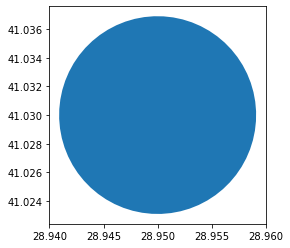

In [36]:
loc_gdf.plot()

  
To plot a map of Istanbul as a basemap we have a few options - to see examples which work well with `Geopandas`, you can look at the examples in the [GeoPandas Example Gallery](https://geopandas.org/gallery/plotting_basemap_background.html). To keep things consistent with our satellite data, we will convert the FAO GAUL 2015 area for Istanbul which we used above to a type GeoPandas recognizes and use this as our base layer. For more information on converting between `geemap` and `geopandas`, see this [documentation](https://geemap.org/notebooks/geopandas/). 

In [37]:
ist_gpd = geemap.ee_to_geopandas(ee.FeatureCollection("FAO/GAUL/2015/level1").filter(ee.Filter.eq('ADM1_NAME', 'Istanbul')), selectors=['ADM1_NAME'])
ist_gpd.set_crs(4326, inplace=True)

,geometry,ADM0_CODE,ADM0_NAME,ADM1_CODE,ADM1_NAME,DISP_AREA,EXP1_YEAR,STATUS,STR1_YEAR,Shape_Area,Shape_Leng
0,"MULTIPOLYGON (((29.04607 40.91849, 29.05421 40...",249,Turkey,3056,Istanbul,NO,3000,Member State,1000,0.56045,6.169291


We can then plot both on the same graph to view our area in context of the map of Istanbul. We'll use `matplotlib.pyplot` to plot our map with both the Istanbul layer and the buffer area layer. For more information on mapping and plotting with Geopandas, see the [documentation](https://geopandas.org/docs/user_guide/mapping.html).

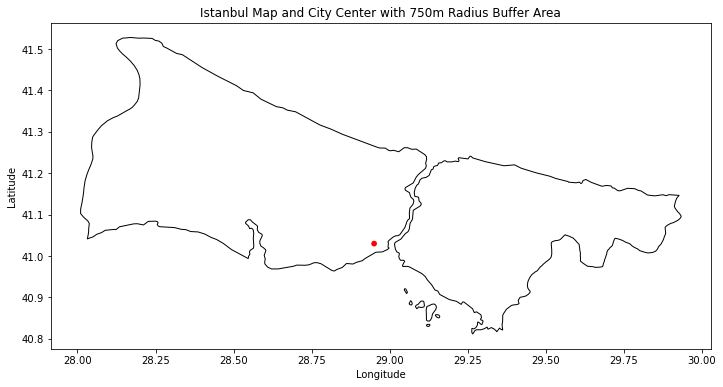

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

ist_gpd.plot(ax=ax, color='white', edgecolor='black')
loc_gdf.plot(ax=ax, color='red')
plt.title('Istanbul Map and City Center with 750m Radius Buffer Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show();


## Calculate light intensity within buffer areas

Since we're interested in the light intensity in these city areas, we can use the DMSP-OLS values from the `avg_vis` band and calculate the mean light intensity for our given area. We will first need to convert our buffer area to an ee.FeatureCollection type and apply `.geometry()` in order to use this area to filter the DMSP-OLS range and subsequently calculate the mean and standard deviation using `geemap`. First, we'll convert the buffer to a type usable by geemap and plot the area to confirm everything went according to plan.

In [149]:
# convert geopandas area to ee recognized area
ee_buff750 = geemap.geopandas_to_ee(loc_gdf).geometry()

# create map centered on Istanbul and identifying the buffer area
map_buff750 = geemap.eefolium.Map(center=[center_lat,center_lon],zoom=12)
map_buff750.addLayer(ee_buff750,vis_params={'color':'a4c639'},opacity=0.8)
map_buff750

Success! This is what we were expecting to see, and now we want to bring our radiance calibrated nighttime lights values back into use. We'll use this boundary area to clip our full DMSP-OLS data from 2010 to only provide values for our area of interest, and then we can use Google Earth Images [reduction](https://developers.google.com/earth-engine/guides/reducers_image) functionality to find the mean and standard deviation of the light intensity in this area. For more information on this function and application, see the [World Bank Nighttime Lights Tutorial](https://worldbank.github.io/OpenNightLights/tutorials/mod3_4_cell_statistics_band_math.html) or the [Google Earth Image Documentation](https://developers.google.com/earth-engine/guides/reducers_reduce_region).

In [43]:
# filter DMSP-OLS values to only include buffer area
dmsp10_ist_750 = dmsp10_vis.median().clip(ee_buff750)

# reduce all pixels in our area to mean and standard deviation
mu750 = dmsp10_ist_750.reduceRegion(reducer=ee.Reducer.mean(),scale=30)
std750 = dmsp10_ist_750.reduceRegion(reducer=ee.Reducer.stdDev(),scale=30)

# cast the mean /std values from our avg_vis band to native ee Numbers
mu750 = ee.Number(mu750.get('avg_vis'))
std750 = ee.Number(std750.get('avg_vis'))

# view the resulting values for mean and standard deviation
print(mu750.getInfo(), std750.getInfo())

577.4093896704712 16.947791146196376


We now have statistics for the intensity of light within a 750m radius of the city center of Istanbul. If we want to compare how light intensity changes as we move away from the city center, as Gonzalez-Navarro and Turner do in `Subways and Urban Growth: Evidence from Earth` (2018), we can create these boundary areas for different, increasing radii around the city center. While we could manually do this for each desired radius, it would be more efficient to create a function which we can reuse for any radii or type of satellite images. 

In [83]:
def calc_intensity(center, radii, image, band):
    """
    Inputs:
        center (list of float): [lon, lat] for center of interest area
        radii (list of int): list of the radii around the center to calculate values for
        image (Image): geemap Image with desired data
        band (str): band to calculate mean/std from
    Returns:
        loc_gdf (GeoDataFrame): a GeoPandas GeoDataFrame with each buffer area as a separate row in CRS 4326
        full_df_ee (DataFrame): a Pandas DataFrame containing the mean and st dev light intensity for each radius's buffer area
    """
    ist_lights = pd.DataFrame()
    num_rows = len(radii)

    center_lon, center_lat = center
    # create basic geopandas dataframe to store the city center point
    ist_buffs = pd.DataFrame({'lon':center_lon, 'lat':center_lat}, index=[0])
    # add rows to dataframe to match number of radii provided
    ist_buffs = pd.concat([ist_buffs]*num_rows, ignore_index=True)
    ist_buffs = gpd.GeoDataFrame(ist_buffs, geometry=gpd.points_from_xy(ist_buffs.lon, ist_buffs.lat, crs=4326))
    # convert to Turkey CRS for calculation of buffer radii in meters
    ist_buffs = ist_buffs.to_crs(5637)

    # convert points to buffers of specified radii 
    for i in range(num_rows):
        radius = radii[i]
        print('creating buffer area for radius', radius / 1000)
        ist_buffs.loc[i, 'geometry'] = ist_buffs.loc[i,'geometry'].buffer(radius)
        ist_buffs.loc[i, 'radius'] = radius / 1000
    
    # convert back to lat/long CRS for use with geemap
    ist_buffs.to_crs(4326, inplace=True)

    for i in range(num_rows):
        radius = radii[i] / 1000
        print('calculating mean and std for radius', radius)
        # pull out single row from buffer dataframe
        gpd_buff = gpd.GeoDataFrame(ist_buffs[i : i+1])
        # convert geopandas geometry to ee geometry for use in geemap
        ee_buff = geemap.geopandas_to_ee(gpd_buff).geometry()
        # clip radiance calibrated DMSP-OLS values to only include buffer area
        dmsp10_ist_buff = image.clip(ee_buff)
        
        # Calculate mean and standard deviation for area
        mu = dmsp10_ist_buff.reduceRegion(reducer=ee.Reducer.mean(),scale=30)
        std = dmsp10_ist_buff.reduceRegion(reducer=ee.Reducer.stdDev(),scale=30)
        mu = ee.Number(mu.get(band))
        std = ee.Number(std.get(band))
        
        # add all values to dataframe
        df = pd.DataFrame({'lon':center_lon, 'lat':center_lat, 'radius (km)': radius, 'value':band, 'mean': mu.getInfo(), 'std': std.getInfo()}, index=[radius])
        ist_lights = ist_lights.append(df)

    return ist_buffs, ist_lights 

In [84]:
# set instanbul as the center
center = [28.95, 41.03]

# set list of radii as defined in Gonzalez-Navarro and Turner (2018)
radii = [750, 3250, 7500, 17500, 37500]

# calculate mean and std for each buffer area specified in radii
ist_buffs, ist_lights = calc_intensity(center, radii, dmsp10_vis.median(), 'avg_vis')
ist_lights

creating buffer area for radius 0.75
creating buffer area for radius 3.25
creating buffer area for radius 7.5
creating buffer area for radius 17.5
creating buffer area for radius 37.5
calculating mean and std for radius 0.75
calculating mean and std for radius 3.25
calculating mean and std for radius 7.5
calculating mean and std for radius 17.5
calculating mean and std for radius 37.5


,lon,lat,radius (km),value,mean,std
0.75,28.95,41.03,0.75,avg_vis,577.409390,16.947791
3.25,28.95,41.03,3.25,avg_vis,499.255253,122.823918
7.50,28.95,41.03,7.50,avg_vis,389.229512,182.805458
17.50,28.95,41.03,17.50,avg_vis,205.333103,174.086222
37.50,28.95,41.03,37.50,avg_vis,71.543302,118.355557


We now have the mean and standard deviation light intensity for a range of increasing areas around the city of Istanbul. If we want to visualize the complete set of areas for which we have data, we can plot all of our values from the `ist_buffs` table - the first object returned from our function. We can first plot only the buffer areas themselves:

<AxesSubplot:>

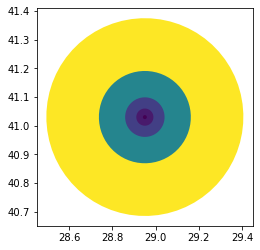

In [49]:
ist_buffs.sort_values(by='radius', ascending=False).plot(column='radius')

Once again, it would be helpful to have a background map of Istanbul to put these areas in context. We can use the same process as above for our single 750m buffer area to instead plot all our areas over the map of Istanbul:

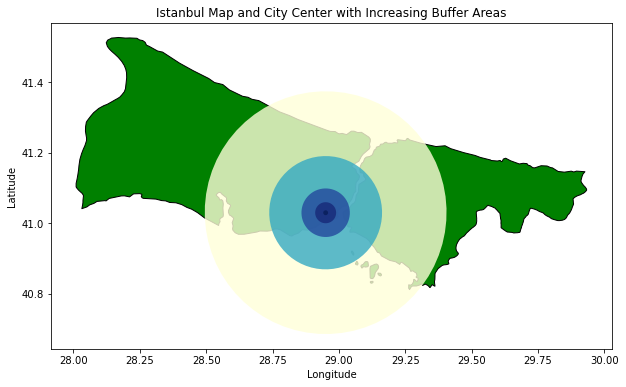

In [50]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_aspect('equal')

ist_gpd.plot(ax=ax, color='green', edgecolor='black')
ist_buffs.sort_values(by='radius', ascending=False).plot(ax=ax, column='radius', alpha=0.8, cmap='YlGnBu_r')
plt.title('Istanbul Map and City Center with Increasing Buffer Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Characterize City Centrality

We can next use our values of mean radiance in each layer to characterize the centrality of a city. In "Subways and Urban Growth: Evidence from Earth", Gonzalez-Navarro and Turner use the regression $$lny_i=A+Blnx_i+\epsilon_i$$ to create these centrality measures, where $y_i$ is the mean light intensity within an area, $x_i$ is the radius of the associated area, and B is the rate at which light decays when increasing the distance from the city center. A higher negative value for B indicates that the city density decreases more rapidly, which the authors identify as an indication of greater centralization.  
  
We'll be using the package `scikit-learn`, a powerful machine learning package in Python, to perform the regression. To install sklearn, follow the [installation guide](https://scikit-learn.org/stable/install.html).

In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression 

y = np.log(ist_lights['mean'])
x = np.array(np.log(ist_lights['radius (km)'])).reshape((-1,1))

lin_model = LinearRegression().fit(x, y)

In [55]:
print("""
    Intercept: {}
    Slope: {}

""".format(
        lin_model.intercept_,
        lin_model.coef_[0]
))


    Intercept: 6.566764153523353
    Slope: -0.500727953994751




We can follow Gonzalez-Navarro and Turner (2018) and interpret the intercept as the brightness at the city center. The slope is interpreted as the rate at which light decays from the center, which provides a measure of city centralization. Comparing these measures of brightness and centralization across cities can produce useful comparisons, as can comparing the same city over time. However, in order to use these radiance calibrated nighttime lights data from multiple years and satellites, we'll need to first perform inter-annual calibration. 

# INTER-ANNUAL CALIBRATION

## Inter-annual Calibration of Radiance Calibrated Nighttime Lights Data

As mentioned in Section 1, the variation between sensors and across years makes these data incomparable when used directly. Instead, we must perform inter-annual calibration to bring all data files to a common scale which we can directly compare over time. The [documentation](https://ngdc.noaa.gov/eog/dmsp/radcal_readme.txt) for these data provide instructions on inter-annual calibration using the 2005 data as a reference set. All other data files will be adjusted according to the formula $$Y=Coeff_0+Coeff_1*X$$ where Y is the adjusted data, X is the original data, and the coefficients are provided unique to each data file in Table 3 of the documentation. 

We can create a pandas dataframe in Python which contains these values and which we can use to adjust each of the datasets. 

In [56]:
coefs_df = pd.DataFrame(
    {'C0': [4.336,
            1.423,
            3.658,
            3.736,
            1.062,
            2.196,
            -1.987
            ], 
    'C1': [0.915,
            0.78,
            0.71,
            0.797,
            0.761,
            1.195,
            1.246
            ]}, 
    index=['F12_19960316-19970212_rad_v4',
            'F12_19990119-19991211_rad_v4',
            'F12-F15_20000103-20001229_rad_v4',
            'F14-F15_20021230-20031127_rad_v4',
            'F14_20040118-20041216_rad_v4',
            'F16_20100111-20101209_rad_v4',
            'F16_20100111-20110731_rad_v4'
            ])
coefs_df

,C0,C1
F12_19960316-19970212_rad_v4,4.336,0.915
F12_19990119-19991211_rad_v4,1.423,0.780
F12-F15_20000103-20001229_rad_v4,3.658,0.710
F14-F15_20021230-20031127_rad_v4,3.736,0.797
F14_20040118-20041216_rad_v4,1.062,0.761
F16_20100111-20101209_rad_v4,2.196,1.195
F16_20100111-20110731_rad_v4,-1.987,1.246


We can use the data from 2004 as an example of performing this calibration. We'll be adjusting these 2004 values according to the formula and coefficients provided above, ultimately producing an output image $$Y_{2004}=1.062+0.761*X_{2004}$$ where $X_{2004}$ is the raw image obtained of the 2004 satellite data. We can first follow the same process as above to obtain the 2004 radiance calibrated nighttime lights data.

In [136]:
dmsp_04 = ee.ImageCollection("NOAA/DMSP-OLS/CALIBRATED_LIGHTS_V4").filterDate('2004-01-01', '2004-12-31')
dmsp_04.size().getInfo()

1

In [135]:
from datetime import datetime

# Confirm correct date (code from World Bank Nighttime Lights Tutorial)
imgrange = dmsp_04.reduceColumns(ee.Reducer.minMax(), ["system:time_start"])
start = ee.Date(imgrange.get('min')).getInfo()['value']
end = ee.Date(imgrange.get('max')).getInfo()['value']

start = datetime.utcfromtimestamp(start/1000).strftime('%Y-%m-%d %H:%M:%S')
end = datetime.utcfromtimestamp(end/1000).strftime('%Y-%m-%d %H:%M:%S')
print(f"Date range: {start, end}")

Date range: ('2004-01-18 00:00:00', '2004-01-18 00:00:00')


To correct these 2004 values according to our equation, we'll use the GEE `.expression()` method to apply our formula to the ImageCollection data. We'll define a function `calibrate_lights()` which will cycle through all Images in an ImageCollection (though in the case of our `dmsp_04` ImageCollection, only a single Image is present), apply the formula to the values in each Image, and return an ImageCollection of the same size with values calculated from the formula.

In [137]:
def calibrate_lights(img):
    cal_img = img.expression('1.062 + (0.761 * x)', {'x': img.select('avg_vis')})
    return cal_img.rename(['avg_vis'])
dmsp04_clbr = dmsp_04.map(calibrate_lights)

Now, let's visualize the differences between our original values and these new calibrated ones. We'll follow the same process described in the [World Bank's Open Nighttime Lights Tutorial, Section 5.1.3](https://worldbank.github.io/OpenNightLights/tutorials/mod5_1_DMSP-OLS_intercalibration.html).

In [142]:
# convert both the original DMSP-OLS radiance calibrated 2004 layer and the re-calibrated layer to numpy arrays
dmsp2004_arr = geemap.ee_to_numpy(dmsp_04_vis, region=ist_geom)
dmsp2004_clbr_arr = geemap.ee_to_numpy(dmsp04_clbr.median(), region=ist_geom)

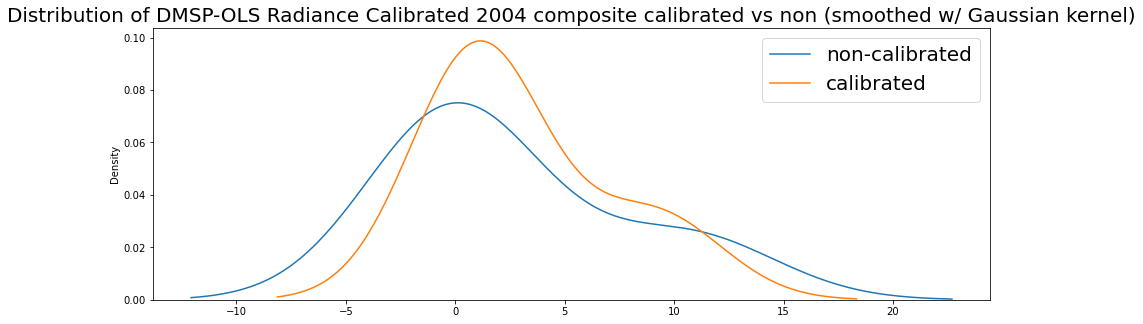

In [143]:
import seaborn as sns

# Plot numpy arrays to compare distribution of values
fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(dmsp2004_arr.flatten(), label='non-calibrated',legend=True, ax=ax)
sns.kdeplot(dmsp2004_clbr_arr.flatten(), label='calibrated',legend=True, ax=ax)
plt.legend(fontsize=20)
plt.title('Distribution of DMSP-OLS Radiance Calibrated 2004 composite calibrated vs non (smoothed w/ Gaussian kernel)', fontsize=20);

While this works well for a single year's calibration, if we want to calibrate multiple years it would be easier to create a function which can use our `coefs_df` DataFrame of coefficients and automatically calibrate the ImageCollections for each year. See the World Bank's [Open Night Lights module 5, section 1.4](https://worldbank.github.io/OpenNightLights/tutorials/mod5_1_DMSP-OLS_intercalibration.html) for a function which will obtain and apply coefficients as well as clip the final Images. 

# USAGE EXAMPLE

These radiance calibrated nighttime lights can be used to study a number of phenomena within city boundaries where the amount of lighting causes saturation in the standard DMSP-OLS nighttime lights data. In "Subways and Urban Growth: Evidence from Earth" (2018), by Gonzalez-Navarro and Turner, one of the questions the authors consider is the effect of subways on urban centralization. They measure urban centralization with the light gradient and city center brightness from the regression equation we utilized above: $$lny_i=A+Blnx_i+\epsilon_i$$ where $y_i$ is the mean light intensity within an area, $x_i$ is the radius of the associated area, and B is the rate at which light decays when increasing the distance from the city center.  
  
Using A and B as their dependent variables, the authors perform a first difference regression of these light values on the number of subway stations to identify the extent of centralization in cities with larger subway networks. The independent variable in their dataset is `Dlop`, which is the difference in natural log of the number of subway stations in a city over 5-year periods. The dependent variables are `Dlinear_b1`, which is the difference in light gradient over 5-year periods, and `Dlinear_b0`, which is the difference in light intercept over 5-year periods. They use country GDP (specifically, the difference in natural log of a country's GDP, `Dlgdp`), population (specifically, the difference in natural log of a country's population, `Dlcountry_pop`), continent (`continent`), and 5-year groupings (`quinquenial`) as controls and cluster on urbancode, which uniquely identifies cities.  
  
The authors created a comprehensive subway dataset to provide the primary independent variable in this analysis. This dataset contains information on station locations and years built for all subway stations worldwide. They make this data available for all users, and it can be downloaded [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VHPRTA) in the `subway_census_v1` folder. For more information on this dataset and a tutorial on its use, see the Geo4Dev Subways Learning Module. 

We can use the package `statsmodels` in order to run this regression. To install, you can use `conda install statsmodels` if you're using a conda environment or `pip install statsmodels` if not.  
  
First, we'll read in the replication data, which you can download [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VHPRTA) as a 7Z folder. 7Z files are compressed using the open-source 7-Zip tool and typically require a third-party app to access. There are many apps available to open 7Z files, but an easy option for Windows users is to download the [7-Zip app directly](https://www.7-zip.org/download.html). MacOS users can use a tool like the  [Unarchiver](https://www.howtogeek.com/226729/how-to-open-7z-and-other-archive-files-on-os-x/). For a more detailed description of working with 7Z files, see [this tutorial for Windows](https://www.howtogeek.com/357846/what-is-a-7z-file-and-how-do-i-open-one/) or [this guide for macOS](https://www.howtogeek.com/226729/how-to-open-7z-and-other-archive-files-on-os-x/).  
  
Once we've read in the data, we'll create a pandas `datetime` version of the year field to use as one of our indices and include `urbanname` (the city name) as another index field. 

In [144]:
rep_data = pd.read_stata('./replication_file/data/analyze_me2_lights.dta')
rep_data['year_dt'] = pd.to_datetime(rep_data['year'])
rep_data.set_index(['urbanname','year_dt'], inplace=True)

Now, we can run our first regression using the light gradient, B, as the dependent variable to measure the effect of subway extent on city centralization.

In [146]:
import statsmodels.formula.api as smf
rep_data_filt = rep_data[rep_data['sub2010']>0]

# regression using light gradient B as dependent variable
b_fit = smf.ols(formula='Dlinear_b1 ~ 1 + Dlop + Dlgdp + Dlcountry_pop + C(quinquenial)*C(continent)', data = rep_data_filt).fit(clustered=True)
print(b_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             Dlinear_b1   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     5.405
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           7.06e-11
Time:                        00:34:56   Log-Likelihood:                 299.81
No. Observations:                 411   AIC:                            -563.6
Df Residuals:                     393   BIC:                            -491.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

The coefficient on the `Dlop` value, which represents the difference in the natural log of subway stations, is the value of interest in this regression: we find a coefficient of 0.0233, which indicates that as the number of subway stations in a city increases, the rate at which light decays becomes more positive. Since a light gradient is negative, with a large negative number indicating the light drops off quickly after leaving a city center, this positive coefficient provides evidence in favor of a smoother light gradient in cities with more extensive subway systems. This aligns with the results in Gonzalez-Navarro and Turner (Table 10, Panel a) and is interpreted as subways encouraging greater decentralization of cities.  
  
We can next consider the same regression using the light intercept - that is, the brightness at a city's center - as the dependent variable.

In [144]:
# regression using light intercept A as dependent variable
a_fit = smf.ols(formula='Dlinear_b0 ~ 1 + Dlop + Dlgdp + Dlcountry_pop + C(quinquenial)*C(continent)', data = rep_data_filt).fit()
print(a_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             Dlinear_b0   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     10.05
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           3.01e-22
Time:                        00:20:34   Log-Likelihood:                -587.54
No. Observations:                 411   AIC:                             1211.
Df Residuals:                     393   BIC:                             1283.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

We find a coefficient of -0.1966 for our variable of interest, `Dlop`, the difference in natural log of subway stations over 5-year periods. This indicates that as the number of subway stations in a city increases, the brightness of the city center itself decreases, which is further evidence of subways encouraging decentralization of a city. 